# Exponential Moving Average (EMA)

In [1]:
import torch as t
import matplotlib.pyplot as plt

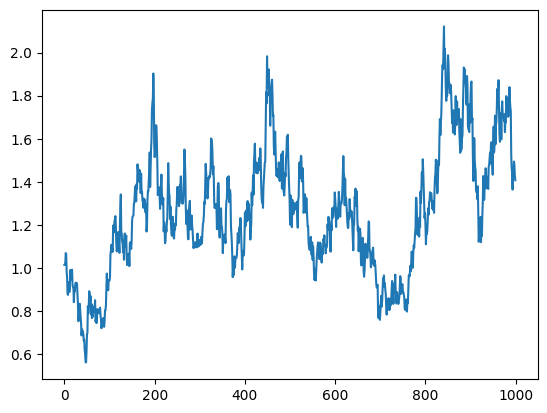

In [16]:
def make_random_stock(n=1000, start=1, volatility=0.05):
    x = t.arange(n).float()
    daily_returns = t.randn(n) * volatility + 1
    prices = start * t.cumprod(daily_returns, dim=0)
    return x, prices

t.manual_seed(0xbadc0de)
x, y = make_random_stock()
plt.plot(x, y)
plt.show()

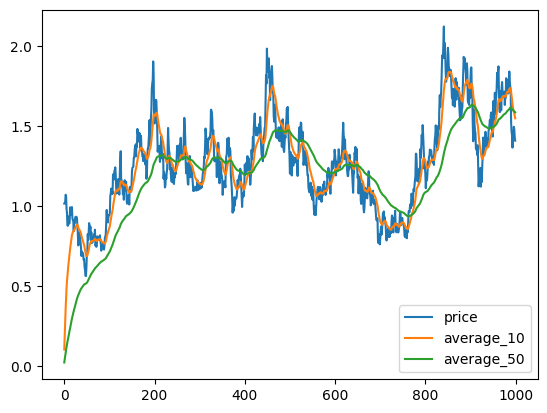

In [18]:
def ema(prices, decay=0.9):
    res = []
    average = 0
    for price in prices:
        average = decay * average + (1 - decay) * price
        res.append(average)
    return t.tensor(res)

average_10 = ema(y, decay=0.9)
average_50 = ema(y, decay=0.98)
plt.plot(x, y, label='price')
plt.plot(x, average_10, label='average_10')
plt.plot(x, average_50, label='average_50')
plt.legend()
plt.show()